In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
Consumer_Key = "8gkozHxDwmXsvgLvqXMBWcx9T"
Consumer_Secret_Key = "ycxz3P69xHVYUNY6ViqvYVxAuahB886yLSF4qTxCJ46NnR8tIH"
Access_Token = "1331481154189361153-S55qEPfYnPzwLIMFLUonKFt9Z9H3hX"
Access_Token_Secret = "i3S0tbdBqBSxtC32UVGZt8VGjFMlFwDUvkeUkEVfiSrfS"

In [3]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [4]:
posts = api.user_timeline(screen_name="telkomsel", count = 1000, lang ="en", tweet_mode="extended")

# Print 30 tweet
print("Show the 30 recent tweets:\n")
i=1
for tweet in posts[:30]:
  print(str(i) +') '+ tweet.full_text + '\n')
  i= i+1

Show the 30 recent tweets:

1) @13umx Baik, Kak. Mimin cek DM Kakak udah masuk antrian, mohon ditunggu ya. Dengan senang hati mimin akan merespon DM nya. Makasih :) -Cheryl

2) @thirdsipe Siap, Kak. Mimin cek DM Kakak sudah masuk antrian. Mohon berkenan menunggu interaksi selanjutnya via DM ya. Makasih :) -Asti

3) @13umx Siang Kak. Silakan ada yang bisa dibantu seputar produk dan layanan Telkomsel Kak? Tks :) -Rayan

4) @rzprygw Baik, Kak. Mimin cek DM nya sudah masuk antrian, mohon ditunggu ya. Dengan senang hati mimin akan merespon DM nya. Makasih :) -Kanaya

5) @rzprygw Kirim via DM ya, agar dapat dibantu pengecekkan dan privasi terjaga. Makasih :) -Ruina (2/2)

6) @rzprygw Hai, Kak. Maaf ya jadi ga nyaman. Mengenai keluhan tidak bisa melakukan panggilan, apakah sebelumnya sudah mencoba refresh jaringan dengan cara restart handphone? Jika sudah mencoba, namun tetap sama, mohon infokan nomor HP, lokasi detail, tanggal kejadian. (1/2)

7) @zxchx_ Hai, Kak. Maaf ya jadi ga nyaman. Men

In [5]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,"@13umx Baik, Kak. Mimin cek DM Kakak udah masu..."
1,"@thirdsipe Siap, Kak. Mimin cek DM Kakak sudah..."
2,@13umx Siang Kak. Silakan ada yang bisa dibant...
3,"@rzprygw Baik, Kak. Mimin cek DM nya sudah mas..."
4,"@rzprygw Kirim via DM ya, agar dapat dibantu p..."


In [7]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,"@13umx Baik, Kak. Mimin cek DM Kakak udah masu..."
1,"Siap, Kak. Mimin cek DM Kakak sudah masuk ant..."
2,@13umx Siang Kak. Silakan ada yang bisa dibant...
3,"Baik, Kak. Mimin cek DM nya sudah masuk antri..."
4,"Kirim via DM ya, agar dapat dibantu pengecekk..."
...,...
195,"82515466 Hai, Kak Jlee. Maaf ya. Terkait keluh..."
196,"3. Lakukan logout, clear cache, clear data da..."
197,"Hai, Kak. Maaf ya jadi ga nyaman. Apakah kelu..."
198,"Baik, Kak Ira. Mengenai informasi tersebut, m..."


In [8]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,"@13umx Baik, Kak. Mimin cek DM Kakak udah masu...",1.000000,0.500000
1,"Siap, Kak. Mimin cek DM Kakak sudah masuk ant...",1.000000,0.500000
2,@13umx Siang Kak. Silakan ada yang bisa dibant...,1.000000,0.500000
3,"Baik, Kak. Mimin cek DM nya sudah masuk antri...",1.000000,0.500000
4,"Kirim via DM ya, agar dapat dibantu pengecekk...",1.000000,0.500000
...,...,...,...
195,"82515466 Hai, Kak Jlee. Maaf ya. Terkait keluh...",1.000000,0.500000
196,"3. Lakukan logout, clear cache, clear data da...",0.588889,0.233333
197,"Hai, Kak. Maaf ya jadi ga nyaman. Apakah kelu...",0.000000,0.000000
198,"Baik, Kak Ira. Mengenai informasi tersebut, m...",1.000000,0.500000


<function matplotlib.pyplot.show>

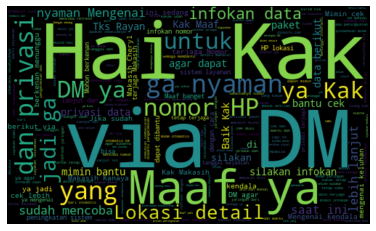

In [9]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [10]:
#Create a function to compute negative (-1), netral (0) and positive (+1) analysis
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Netral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
#Show the dataframe
df 

,Tweets,Subjectivity,Polarity,Analysis
0,"@13umx Baik, Kak. Mimin cek DM Kakak udah masu...",1.000000,0.500000,Positive
1,"Siap, Kak. Mimin cek DM Kakak sudah masuk ant...",1.000000,0.500000,Positive
2,@13umx Siang Kak. Silakan ada yang bisa dibant...,1.000000,0.500000,Positive
3,"Baik, Kak. Mimin cek DM nya sudah masuk antri...",1.000000,0.500000,Positive
4,"Kirim via DM ya, agar dapat dibantu pengecekk...",1.000000,0.500000,Positive
...,...,...,...,...
195,"82515466 Hai, Kak Jlee. Maaf ya. Terkait keluh...",1.000000,0.500000,Positive
196,"3. Lakukan logout, clear cache, clear data da...",0.588889,0.233333,Positive
197,"Hai, Kak. Maaf ya jadi ga nyaman. Apakah kelu...",0.000000,0.000000,Netral
198,"Baik, Kak Ira. Mengenai informasi tersebut, m...",1.000000,0.500000,Positive


In [11]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) @13umx Baik, Kak. Mimin cek DM Kakak udah masuk antrian, mohon ditunggu ya. Dengan senang hati mimin akan merespon DM nya. Makasih :) -Cheryl

2)  Siap, Kak. Mimin cek DM Kakak sudah masuk antrian. Mohon berkenan menunggu interaksi selanjutnya via DM ya. Makasih :) -Asti

3) @13umx Siang Kak. Silakan ada yang bisa dibantu seputar produk dan layanan Telkomsel Kak? Tks :) -Rayan

4)  Baik, Kak. Mimin cek DM nya sudah masuk antrian, mohon ditunggu ya. Dengan senang hati mimin akan merespon DM nya. Makasih :) -Kanaya

5)  Kirim via DM ya, agar dapat dibantu pengecekkan dan privasi terjaga. Makasih :) -Ruina (2/2)

6) _ Hai, Kak. Maaf ya jadi ga nyaman. Mengenai kendala jaringan yang menyebabkan akses internet lambat, mimin infokan saat ini sedang ada peningkatan sistem layanan kami. Diupayakan bisa selesai secepatnya ya, Kak. Makasih untuk tetap menggunakan Telkomsel :) -Ruina

7) _   mohon infokan nomor HP, nama lengkap, tempat dan tanggal lahir. Kirim via DM

In [12]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) _ Duh, maaf ya Kak :( Mengenai Paket Combo Sakti merupakan Paket Promo ya Kak. Telkomsel memberikan penawaran secara personal sesuai dengan profile masing-masing pelanggan berdasarkan lama berlangganan dan rata-rata penggunaan dalam periode waktu yang telah ditentukan. (1/2)

2)  Hai, Kak. Maaf banget udah dibuat ga nyaman. Mengenai kendala ga bisa aktivasi paket dengan keterangan pembayaran dalam proses, silakan infokan data berikut via DM agar dibantu cek lebih lanjut dan privasi data Kakak tetap terjaga: (1/2)

3)   Siang, Kak. Makasih ya udah berkenan menunggu. Terkait kendala pembelian paket data Telkomsel melalui aplikasi Shopee yang Kakak alami. Silakan infokan data berikut via DM ya agar dapat mimin bantu cek dan privasi data terjaga: (1/2)

4)  Hai, Kak Yahya. Maaf ya udah bikin ga nyaman. Apabila Kakak mengalami kendala pada saat melakukan pembelian paket, silakan infokan data berikut via DM ya agar dapat mimin bantu cek dan privasi data terjaga:

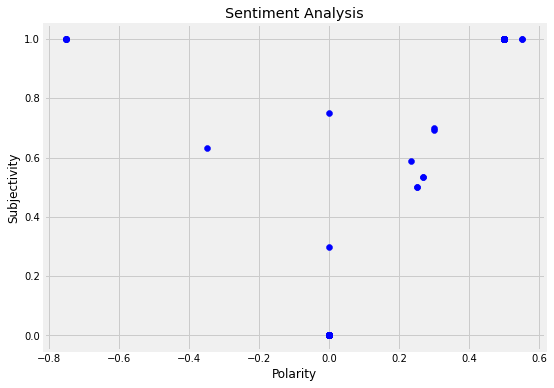

In [13]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [14]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

76.0

In [15]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

3.5

In [16]:
# Show the value counts
df['Analysis'].value_counts()

Positive    152
Netral       41
Negative      7
Name: Analysis, dtype: int64

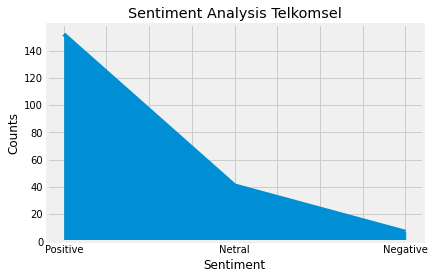

In [18]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis Telkomsel')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'area')
plt.show()